<a href="https://colab.research.google.com/github/guy-davidi/Deep_Learning/blob/main/Parity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3-Parity**

**Imports**

In [41]:
from os import error

import matplotlib.pyplot as plt
import numpy as np
import math 

**Constants**

In [42]:
lr = 2
EPOCHS = 2000
err = 0
output_dim = 1

**The logistic sigmoeid function**

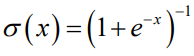

In [43]:
def logistic_sigmoeid(x):
    return 1/( 1 + np.exp(-x))

**get database**

In [44]:
def get_database_3_parity():
    return np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
#print(type(get_database_3_parity()))

**get labels**

In [45]:
def get_labels():
    return [1, 1, 1, 1, 0, 0, 0, 0]

**Loss function**

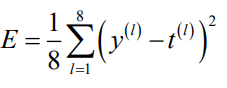

In [46]:
def calculate_loss(y_true, y_pred):
    return np.average((y_pred - y_true)**2)

# **Model**

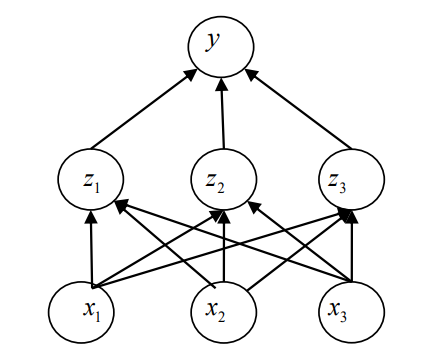

In [47]:
def build_model(X, hidden_dim):
    model = {}
    
    # rnd is N ~ (0,1) value by defult - layer 1
    model["weight_layer_1"] = np.random.randn(X.shape[1], hidden_dim)
    model["bias_layer_1"] = np.random.randn(1, hidden_dim)

    # rnd is N ~ (0,1) value by defult - layer 2
    model["weight_layer_2"] = np.random.randn(hidden_dim, output_dim)
    model["bias_layer_2"] = np.random.randn(output_dim, 1)

    return model

def forward(X, model):
    pred = []
     
    weight_layer_1 = model["weight_layer_1"]
    bias_layer_1 = model["bias_layer_2"]
    
    # build the a after activation and dot with w
    z_layer_1 = X.dot(weight_layer_1) + bias_layer_1
    a_layer_1 = logistic_sigmoeid(z_layer_1) 

    
    weight_layer_2 = model["weight_layer_2"]
    bias_layer_2 = model["bias_layer_2"]
    
    # build the a after activation and dot with w
    z2 = a_layer_1.dot(weight_layer_2) + bias_layer_2
    out = logistic_sigmoeid(z2)

    # get the prediction for this forward pass
    for t in out:
        if (t < 0.5):
            pred.append(0.0)
        else:
            pred.append(1.0)

    return z_layer_1, a_layer_1, z2, np.array(pred) 

**Plot**

In [48]:
def plot_dict(sum_losses):
    plt.plot(list(sum_losses.keys()), list(sum_losses.values()))
    plt.title('Loss Vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# **Training**

In [49]:
def train(model, X, y):
    losses = []

    for i in range(EPOCHS):
        z1, a1, z2, pred = forward(X, model)
        # calculte the err
        err = np.expand_dims((pred - y)/8, axis=1) 
        
        #calculte the Derivatives layer 2
        delta_2 = err * logistic_sigmoeid(z2)
        dw2 = np.dot(a1.T, delta_2)
        db2 = np.sum(delta_2, axis=0)

        #calculte the Derivatives layer 1
        delta_1 = np.dot(delta_2, model["weight_layer_2"].T) * logistic_sigmoeid(a1)
        dw1 = np.dot(X.T, delta_1)
        db1 = np.sum(delta_1, axis=0)

        # step for each parameter with lr == learning rate == 2 due to Q
        model["weight_layer_1"] -= lr * dw1
        model["bias_layer_1"] -= lr * db1
        model["weight_layer_2"] -= lr * dw2
        model["bias_layer_2"] -= lr * db2 

        loss = calculate_loss(y, pred)
        losses.append(loss)

    return losses 




########## The layer dimension is 3 ##########



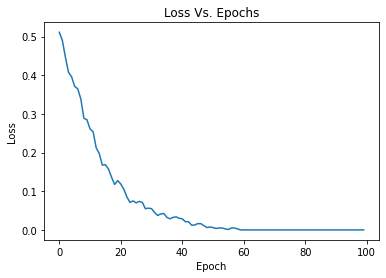



########## The layer dimension is 6 ##########



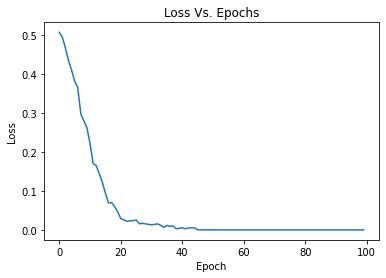

In [50]:
def main(): 
    # get database
    X = get_database_3_parity()
    # get labels corresponding the values
    y = get_labels()

    sum_losses = {}
    # run with 3 or 6 dim as Q
    for dim in [3,6]:
        for i in range(0,100):
            # build the model
            model = build_model(X, dim)
            losses = train(model, X, y)
            for epoch_idx in range(0, 100):
                sum_losses[epoch_idx] = sum_losses.get(epoch_idx, 0) + losses[epoch_idx]

        for key in sum_losses.keys():
            sum_losses[key] /= 100
        print("\n")
        print(f"########## The layer dimension is {dim} ##########\n")

        #Plots
        plot_dict(sum_losses)

main()


**It can be seen that for a larger number of neurons the model converges more smoothly.**